# 🔹 CELL 1 – Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


#🔹 CELL 2 – Generate Synthetic Dataset (with noise)

In [2]:
np.random.seed(42)

X = np.linspace(0, 10, 100)
y = 3 * X + 5 + np.random.randn(100) * 2

# Reshape for vectorized math
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)


#🔹 CELL 3 – Train / Validation Split

In [3]:
split = int(0.8 * len(X))

X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]


#🔹 CELL 4 – Feature Scaling

In [4]:
X_mean, X_std = X_train.mean(), X_train.std()

X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean) / X_std


#🔹 CELL 5 – Initialize Parameters

In [5]:
w = np.random.randn(1, 1)
b = np.zeros((1, 1))

learning_rate = 0.1
epochs = 500
lambda_reg = 0.01      # L2 regularization


#🔹 CELL 6 – Loss Function (MSE + L2)

In [6]:
def compute_loss(X, y, w, b, lambda_reg):
    m = len(X)
    y_pred = X @ w + b
    mse = (1/m) * np.sum((y_pred - y) ** 2)
    l2 = lambda_reg * np.sum(w ** 2)
    return mse + l2


#🔹 CELL 7 – Advanced Gradient Descent Loop

In [7]:
train_losses = []
val_losses = []

best_loss = float("inf")
patience = 20
patience_counter = 0

for epoch in range(epochs):
    # Predictions
    y_pred = X_train @ w + b

    # Gradients
    dw = (2/len(X_train)) * X_train.T @ (y_pred - y_train) + 2 * lambda_reg * w
    db = (2/len(X_train)) * np.sum(y_pred - y_train)

    # Update learning rate (decay)
    lr = learning_rate / (1 + 0.01 * epoch)

    # Update parameters
    w -= lr * dw
    b -= lr * db

    # Compute losses
    train_loss = compute_loss(X_train, y_train, w, b, lambda_reg)
    val_loss = compute_loss(X_val, y_val, w, b, lambda_reg)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break


Early stopping at epoch 414


#🔹 CELL 8 – Final Parameters

In [8]:
print("Final Weight:", w)
print("Final Bias:", b)


Final Weight: [[6.98311014]]
Final Bias: [[16.72201667]]


#🔹 CELL 9 – Loss Curves

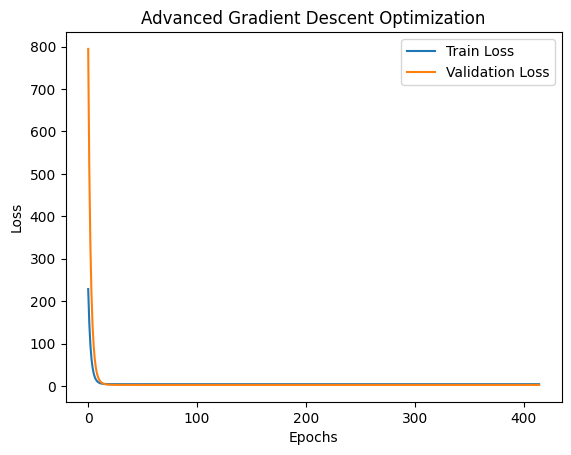

In [9]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Advanced Gradient Descent Optimization")
plt.show()


#🔹 CELL 10 – Final Model Fit Visualization

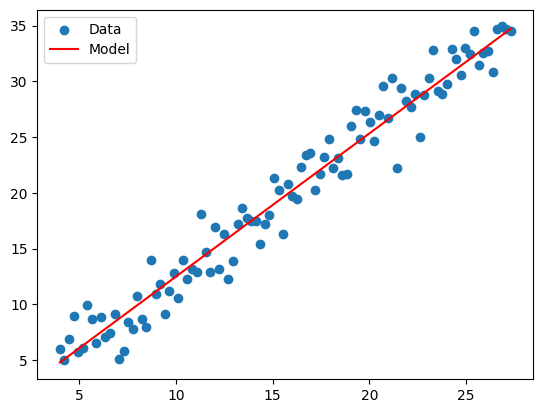

In [10]:
X_plot = (X * X_std) + X_mean
y_pred = ( (X - X_mean) / X_std ) @ w + b

plt.scatter(X_plot, y, label="Data")
plt.plot(X_plot, y_pred, color="red", label="Model")
plt.legend()
plt.show()
